In [18]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 
from prophet import Prophet
from itertools import product as prd
from itertools import product

import plotly
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import norm, skew
from prophet import Prophet
from scipy import stats #qqplot
import statsmodels.api as sm #for decomposing the trends, seasonality etc.

from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
df = pd.read_excel('product data.xlsx') 

In [7]:
df.head()

,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,id,ProductKey.1,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice
OrderDate,,,,,,,,,,,,,,,,,,,
2015-01-01,9/21/2001,SO45080,332,14657,1,1,1,1,332,2,BK-R50B-58,"Road-650 Black, 58",Road-650,Value-priced bike with many features of our to...,Black,58,U,413.1463,699.0982
2015-01-01,2001-05-12 00:00:00,SO45079,312,29255,4,1,1,2,312,2,BK-R93R-48,"Road-150 Red, 48",Road-150,This bike is ridden by race winners. Developed...,Red,48,U,2171.2942,3578.2700
2015-01-01,10/29/2001,SO45082,350,11455,9,1,1,3,350,1,BK-M82B-44,"Mountain-100 Black, 44",Mountain-100,Top-of-the-line competition mountain bike. Per...,Black,44,U,1898.0944,3374.9900
2015-01-01,11/16/2001,SO45081,338,26782,6,1,1,4,338,2,BK-R50B-44,"Road-650 Black, 44",Road-650,Value-priced bike with many features of our to...,Black,44,U,413.1463,699.0982
2015-02-01,12/15/2001,SO45083,312,14947,10,1,1,5,312,2,BK-R93R-48,"Road-150 Red, 48",Road-150,This bike is ridden by race winners. Developed...,Red,48,U,2171.2942,3578.2700


In [12]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
# df.set_index('OrderDate', inplace=True)


In [13]:
monthly_data = df.groupby(['ProductSKU', pd.Grouper(key='OrderDate', freq='MS')])['OrderQuantity'].sum().reset_index()


In [14]:
product_ids = ['BK-M68B-42', 'BK-M68S-46', 'BK-M68S-38', 'BK-M68B-46', 'BK-M68B-38']
selected_products = monthly_data[monthly_data['ProductSKU'].isin(product_ids)] 

In [30]:
selected_products = selected_products[selected_products['OrderDate'] <= '2017-04-30']

In [31]:
selected_products.shape

(136, 3)

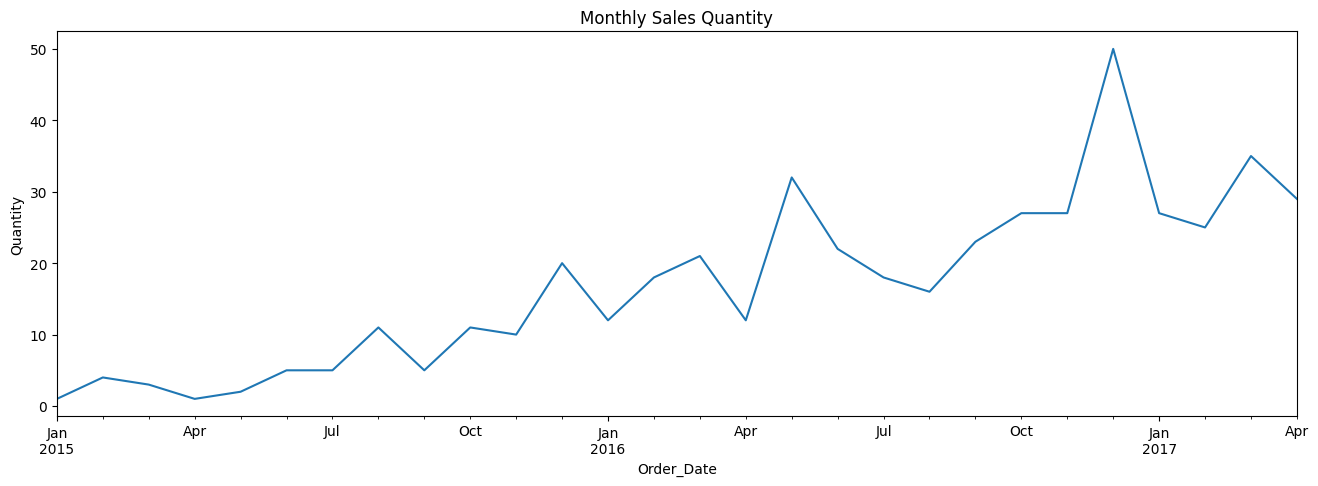

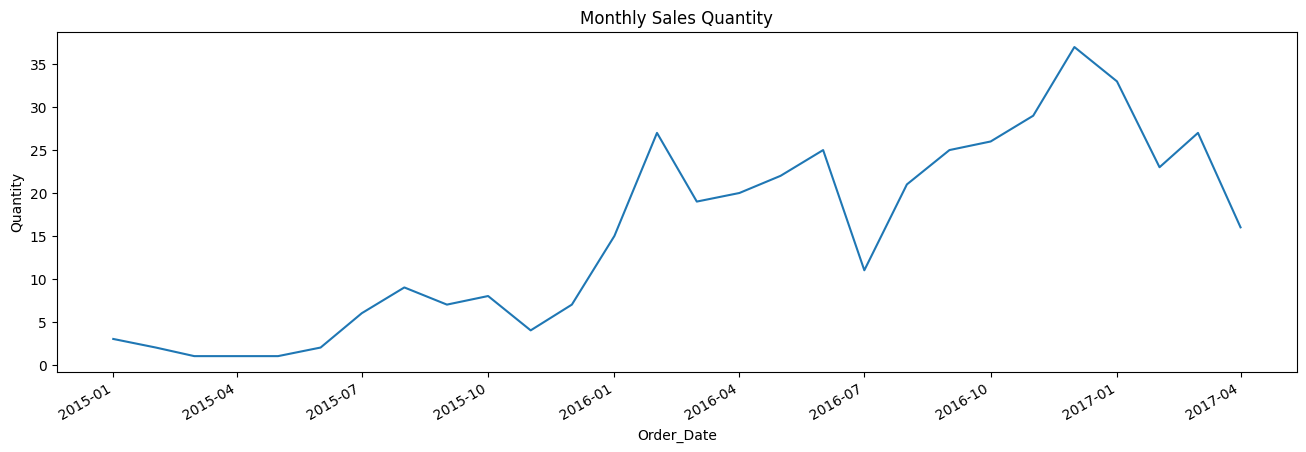

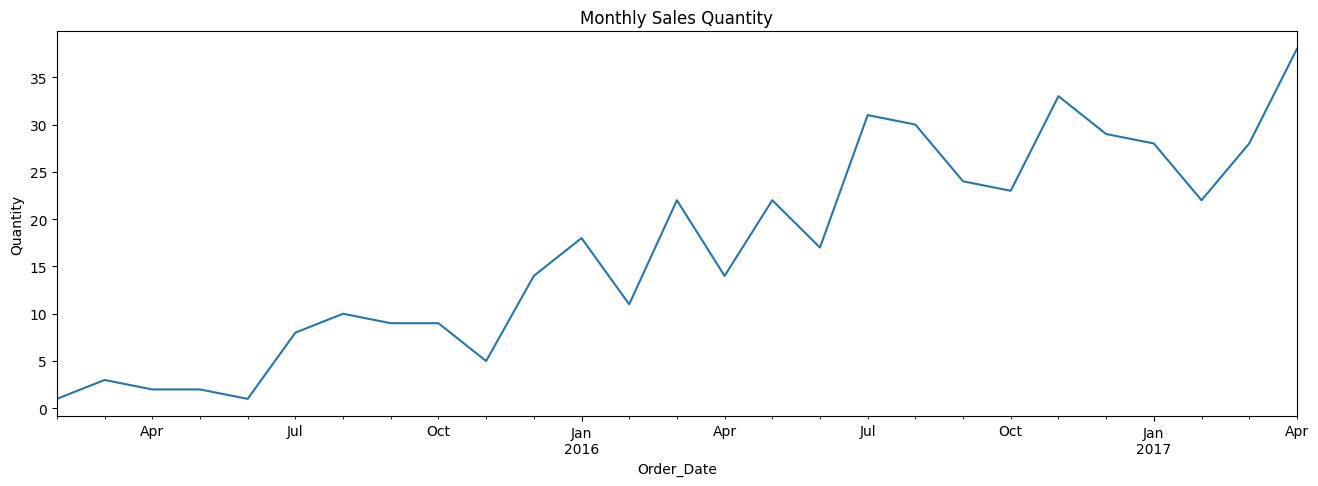

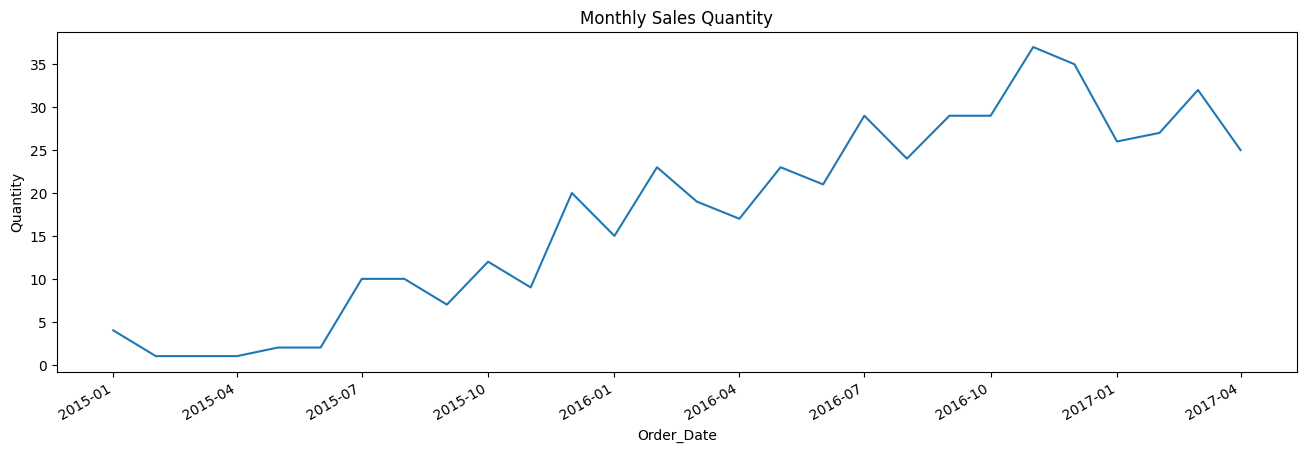

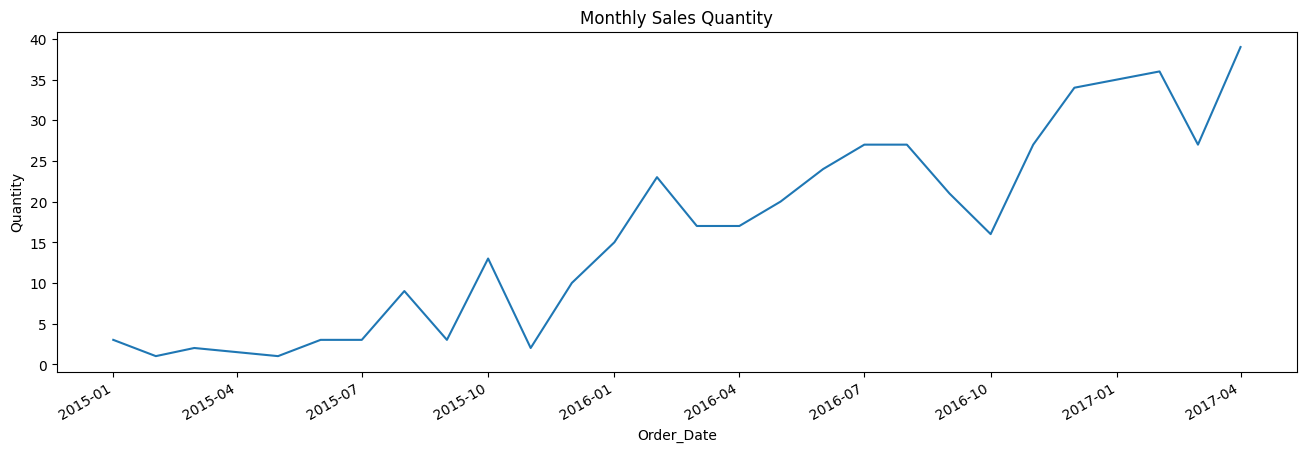

In [33]:
for product in product_ids:
    data = selected_products[selected_products['ProductSKU'] == product] 
    data.set_index('OrderDate', inplace = True)
    monthly_graph = data['OrderQuantity'].plot(figsize = (16,5), title="Monthly Sales Quantity")
    monthly_graph.set(xlabel='Order_Date',ylabel='Quantity')
    plt.show()
    

In [29]:
# Checking for Outliers

for product in product_ids:
    data = monthly_data[monthly_data['ProductSKU'] == product] 
    data.set_index('OrderDate', inplace = True)
    data = data.drop('ProductSKU', axis =1 )
    result = seasonal_decompose(data['OrderQuantity'], model='additive', period=12)
    residual = result.resid.dropna()
    residual_z_scores = np.abs((residual - residual.mean()) / residual.std())
    outliers_residual = residual[residual_z_scores > 3]
    print("Seasonal Decomposition Residual Outliers:")
    print(outliers_residual)

Seasonal Decomposition Residual Outliers:
Series([], Name: resid, dtype: float64)
Seasonal Decomposition Residual Outliers:
Series([], Name: resid, dtype: float64)
Seasonal Decomposition Residual Outliers:
Series([], Name: resid, dtype: float64)
Seasonal Decomposition Residual Outliers:
Series([], Name: resid, dtype: float64)
Seasonal Decomposition Residual Outliers:
Series([], Name: resid, dtype: float64)


In [34]:
selected_products.head()

,ProductSKU,OrderDate,OrderQuantity
316,BK-M68B-38,2015-01-01,3
317,BK-M68B-38,2015-02-01,1
318,BK-M68B-38,2015-03-01,2
319,BK-M68B-38,2015-05-01,1
320,BK-M68B-38,2015-06-01,3


In [44]:
selected_products['log_quantity'] = np.log(selected_products['OrderQuantity'])

selected_products

,ProductSKU,OrderDate,OrderQuantity,log_sales,log_quantity
316,BK-M68B-38,2015-01-01,3,1.098612,1.098612
317,BK-M68B-38,2015-02-01,1,0.000000,0.000000
318,BK-M68B-38,2015-03-01,2,0.693147,0.693147
319,BK-M68B-38,2015-05-01,1,0.000000,0.000000
320,BK-M68B-38,2015-06-01,3,1.098612,1.098612
...,...,...,...,...,...
513,BK-M68S-46,2016-12-01,37,3.610918,3.610918
514,BK-M68S-46,2017-01-01,33,3.496508,3.496508
515,BK-M68S-46,2017-02-01,23,3.135494,3.135494
516,BK-M68S-46,2017-03-01,27,3.295837,3.295837


In [45]:
def ready_data(df):
    train = pd.DataFrame({
        'ds': df[:int(len(df)*0.8)].index, 
        'y': df[:int(len(df)*0.8)]['log_quantity'].values})
    validation = pd.DataFrame({
        'ds': df[int(len(df)*0.8):].index, 
        'y': df[int(len(df)*0.8):]['log_quantity'].values})
    return train, validation

In [46]:
def apply_prophet(train_data, validation, params):
    model = Prophet(**params)
    model.fit(train_data)
   
    future = model.make_future_dataframe(periods=len(validation), freq='M')

    forecast = model.predict(future)
    r2 = r2_score(validation['y'], forecast[-len(validation):]['yhat'])
    rmse = root_mean_squared_error(validation['y'], forecast[-len(validation):]['yhat'])

    return r2, rmse, model

In [47]:
def param_tuning(train, test):
    params_grid = {
        'seasonality_mode': ['multiplicative', 'additive'],
        'changepoint_prior_scale': [0.001, 0.01, 0.1],
        'growth':['linear'],
        'holidays_prior_scale':[0.1,0.3,0.5,0.7],
        'n_changepoints' : [1,2,3,4,5]
    }

    params_combinations = list(prd(*params_grid.values()))

    results = []
    for params in params_combinations:
        params_dict = dict(zip(params_grid.keys(), params))
        r2, rmse, model = apply_prophet(train, test, params_dict)
        results.append({'params': params_dict,'r2': r2, 'rmse': rmse, 'model': model})

    best_params = min(results, key=lambda x: x['rmse'])['params']
    return best_params


In [48]:
## Parameter Tuning
best_params_dict = {}
for product in product_ids:
    data = selected_products[selected_products['ProductSKU'] == product]
    data = data.drop('ProductSKU', axis =1).set_index('OrderDate')
    data = data.resample('MS').sum()
    train, test = ready_data(data)
    
    best_params = param_tuning(train, test)
    best_params_dict[product] = best_params

19:28:44 - cmdstanpy - INFO - Chain [1] start processing
19:28:44 - cmdstanpy - INFO - Chain [1] done processing
19:28:44 - cmdstanpy - INFO - Chain [1] start processing
19:28:44 - cmdstanpy - INFO - Chain [1] done processing
19:28:44 - cmdstanpy - INFO - Chain [1] start processing
19:28:44 - cmdstanpy - INFO - Chain [1] done processing
19:28:44 - cmdstanpy - INFO - Chain [1] start processing
19:28:44 - cmdstanpy - INFO - Chain [1] done processing
19:28:45 - cmdstanpy - INFO - Chain [1] start processing
19:28:45 - cmdstanpy - INFO - Chain [1] done processing
19:28:45 - cmdstanpy - INFO - Chain [1] start processing
19:28:45 - cmdstanpy - INFO - Chain [1] done processing
19:28:45 - cmdstanpy - INFO - Chain [1] start processing
19:28:45 - cmdstanpy - INFO - Chain [1] done processing
19:28:45 - cmdstanpy - INFO - Chain [1] start processing
19:28:45 - cmdstanpy - INFO - Chain [1] done processing
19:28:45 - cmdstanpy - INFO - Chain [1] start processing
19:28:45 - cmdstanpy - INFO - Chain [1]

19:28:55 - cmdstanpy - INFO - Chain [1] done processing
19:28:56 - cmdstanpy - INFO - Chain [1] start processing
19:28:56 - cmdstanpy - INFO - Chain [1] done processing
19:28:56 - cmdstanpy - INFO - Chain [1] start processing
19:28:56 - cmdstanpy - INFO - Chain [1] done processing
19:28:56 - cmdstanpy - INFO - Chain [1] start processing
19:28:56 - cmdstanpy - INFO - Chain [1] done processing
19:28:56 - cmdstanpy - INFO - Chain [1] start processing
19:28:56 - cmdstanpy - INFO - Chain [1] done processing
19:28:56 - cmdstanpy - INFO - Chain [1] start processing
19:28:56 - cmdstanpy - INFO - Chain [1] done processing
19:28:56 - cmdstanpy - INFO - Chain [1] start processing
19:28:56 - cmdstanpy - INFO - Chain [1] done processing
19:28:56 - cmdstanpy - INFO - Chain [1] start processing
19:28:57 - cmdstanpy - INFO - Chain [1] done processing
19:28:57 - cmdstanpy - INFO - Chain [1] start processing
19:28:57 - cmdstanpy - INFO - Chain [1] done processing
19:28:57 - cmdstanpy - INFO - Chain [1] 

19:29:07 - cmdstanpy - INFO - Chain [1] done processing
19:29:07 - cmdstanpy - INFO - Chain [1] start processing
19:29:07 - cmdstanpy - INFO - Chain [1] done processing
19:29:07 - cmdstanpy - INFO - Chain [1] start processing
19:29:07 - cmdstanpy - INFO - Chain [1] done processing
19:29:08 - cmdstanpy - INFO - Chain [1] start processing
19:29:08 - cmdstanpy - INFO - Chain [1] done processing
19:29:08 - cmdstanpy - INFO - Chain [1] start processing
19:29:08 - cmdstanpy - INFO - Chain [1] done processing
19:29:08 - cmdstanpy - INFO - Chain [1] start processing
19:29:08 - cmdstanpy - INFO - Chain [1] done processing
19:29:08 - cmdstanpy - INFO - Chain [1] start processing
19:29:08 - cmdstanpy - INFO - Chain [1] done processing
19:29:08 - cmdstanpy - INFO - Chain [1] start processing
19:29:08 - cmdstanpy - INFO - Chain [1] done processing
19:29:08 - cmdstanpy - INFO - Chain [1] start processing
19:29:08 - cmdstanpy - INFO - Chain [1] done processing
19:29:09 - cmdstanpy - INFO - Chain [1] 

19:29:19 - cmdstanpy - INFO - Chain [1] done processing
19:29:19 - cmdstanpy - INFO - Chain [1] start processing
19:29:19 - cmdstanpy - INFO - Chain [1] done processing
19:29:19 - cmdstanpy - INFO - Chain [1] start processing
19:29:19 - cmdstanpy - INFO - Chain [1] done processing
19:29:19 - cmdstanpy - INFO - Chain [1] start processing
19:29:19 - cmdstanpy - INFO - Chain [1] done processing
19:29:20 - cmdstanpy - INFO - Chain [1] start processing
19:29:20 - cmdstanpy - INFO - Chain [1] done processing
19:29:20 - cmdstanpy - INFO - Chain [1] start processing
19:29:20 - cmdstanpy - INFO - Chain [1] done processing
19:29:20 - cmdstanpy - INFO - Chain [1] start processing
19:29:20 - cmdstanpy - INFO - Chain [1] done processing
19:29:20 - cmdstanpy - INFO - Chain [1] start processing
19:29:20 - cmdstanpy - INFO - Chain [1] done processing
19:29:20 - cmdstanpy - INFO - Chain [1] start processing
19:29:20 - cmdstanpy - INFO - Chain [1] done processing
19:29:20 - cmdstanpy - INFO - Chain [1] 

19:29:31 - cmdstanpy - INFO - Chain [1] done processing
19:29:31 - cmdstanpy - INFO - Chain [1] start processing
19:29:31 - cmdstanpy - INFO - Chain [1] done processing
19:29:31 - cmdstanpy - INFO - Chain [1] start processing
19:29:31 - cmdstanpy - INFO - Chain [1] done processing
19:29:32 - cmdstanpy - INFO - Chain [1] start processing
19:29:32 - cmdstanpy - INFO - Chain [1] done processing
19:29:32 - cmdstanpy - INFO - Chain [1] start processing
19:29:32 - cmdstanpy - INFO - Chain [1] done processing
19:29:32 - cmdstanpy - INFO - Chain [1] start processing
19:29:32 - cmdstanpy - INFO - Chain [1] done processing
19:29:32 - cmdstanpy - INFO - Chain [1] start processing
19:29:32 - cmdstanpy - INFO - Chain [1] done processing
19:29:32 - cmdstanpy - INFO - Chain [1] start processing
19:29:32 - cmdstanpy - INFO - Chain [1] done processing
19:29:32 - cmdstanpy - INFO - Chain [1] start processing
19:29:32 - cmdstanpy - INFO - Chain [1] done processing
19:29:32 - cmdstanpy - INFO - Chain [1] 

19:29:43 - cmdstanpy - INFO - Chain [1] done processing
19:29:43 - cmdstanpy - INFO - Chain [1] start processing
19:29:43 - cmdstanpy - INFO - Chain [1] done processing
19:29:43 - cmdstanpy - INFO - Chain [1] start processing
19:29:43 - cmdstanpy - INFO - Chain [1] done processing
19:29:43 - cmdstanpy - INFO - Chain [1] start processing
19:29:43 - cmdstanpy - INFO - Chain [1] done processing
19:29:44 - cmdstanpy - INFO - Chain [1] start processing
19:29:44 - cmdstanpy - INFO - Chain [1] done processing
19:29:44 - cmdstanpy - INFO - Chain [1] start processing
19:29:44 - cmdstanpy - INFO - Chain [1] done processing
19:29:44 - cmdstanpy - INFO - Chain [1] start processing
19:29:44 - cmdstanpy - INFO - Chain [1] done processing
19:29:44 - cmdstanpy - INFO - Chain [1] start processing
19:29:44 - cmdstanpy - INFO - Chain [1] done processing
19:29:44 - cmdstanpy - INFO - Chain [1] start processing
19:29:44 - cmdstanpy - INFO - Chain [1] done processing
19:29:44 - cmdstanpy - INFO - Chain [1] 

19:29:55 - cmdstanpy - INFO - Chain [1] done processing
19:29:55 - cmdstanpy - INFO - Chain [1] start processing
19:29:55 - cmdstanpy - INFO - Chain [1] done processing
19:29:55 - cmdstanpy - INFO - Chain [1] start processing
19:29:56 - cmdstanpy - INFO - Chain [1] done processing
19:29:56 - cmdstanpy - INFO - Chain [1] start processing
19:29:56 - cmdstanpy - INFO - Chain [1] done processing
19:29:56 - cmdstanpy - INFO - Chain [1] start processing
19:29:56 - cmdstanpy - INFO - Chain [1] done processing
19:29:56 - cmdstanpy - INFO - Chain [1] start processing
19:29:56 - cmdstanpy - INFO - Chain [1] done processing
19:29:56 - cmdstanpy - INFO - Chain [1] start processing
19:29:56 - cmdstanpy - INFO - Chain [1] done processing
19:29:56 - cmdstanpy - INFO - Chain [1] start processing
19:29:56 - cmdstanpy - INFO - Chain [1] done processing
19:29:56 - cmdstanpy - INFO - Chain [1] start processing
19:29:56 - cmdstanpy - INFO - Chain [1] done processing
19:29:57 - cmdstanpy - INFO - Chain [1] 

19:30:08 - cmdstanpy - INFO - Chain [1] done processing
19:30:09 - cmdstanpy - INFO - Chain [1] start processing
19:30:09 - cmdstanpy - INFO - Chain [1] done processing
19:30:09 - cmdstanpy - INFO - Chain [1] start processing
19:30:09 - cmdstanpy - INFO - Chain [1] done processing
19:30:09 - cmdstanpy - INFO - Chain [1] start processing
19:30:09 - cmdstanpy - INFO - Chain [1] done processing
19:30:09 - cmdstanpy - INFO - Chain [1] start processing
19:30:09 - cmdstanpy - INFO - Chain [1] done processing
19:30:09 - cmdstanpy - INFO - Chain [1] start processing
19:30:09 - cmdstanpy - INFO - Chain [1] done processing
19:30:09 - cmdstanpy - INFO - Chain [1] start processing
19:30:09 - cmdstanpy - INFO - Chain [1] done processing
19:30:09 - cmdstanpy - INFO - Chain [1] start processing
19:30:10 - cmdstanpy - INFO - Chain [1] done processing
19:30:10 - cmdstanpy - INFO - Chain [1] start processing
19:30:10 - cmdstanpy - INFO - Chain [1] done processing
19:30:10 - cmdstanpy - INFO - Chain [1] 

19:30:23 - cmdstanpy - INFO - Chain [1] done processing
19:30:23 - cmdstanpy - INFO - Chain [1] start processing
19:30:23 - cmdstanpy - INFO - Chain [1] done processing
19:30:23 - cmdstanpy - INFO - Chain [1] start processing
19:30:23 - cmdstanpy - INFO - Chain [1] done processing
19:30:23 - cmdstanpy - INFO - Chain [1] start processing
19:30:23 - cmdstanpy - INFO - Chain [1] done processing
19:30:23 - cmdstanpy - INFO - Chain [1] start processing
19:30:23 - cmdstanpy - INFO - Chain [1] done processing
19:30:23 - cmdstanpy - INFO - Chain [1] start processing
19:30:23 - cmdstanpy - INFO - Chain [1] done processing
19:30:24 - cmdstanpy - INFO - Chain [1] start processing
19:30:24 - cmdstanpy - INFO - Chain [1] done processing
19:30:24 - cmdstanpy - INFO - Chain [1] start processing
19:30:24 - cmdstanpy - INFO - Chain [1] done processing
19:30:24 - cmdstanpy - INFO - Chain [1] start processing
19:30:24 - cmdstanpy - INFO - Chain [1] done processing
19:30:24 - cmdstanpy - INFO - Chain [1] 

19:38:20 - cmdstanpy - INFO - Chain [1] start processing
19:38:21 - cmdstanpy - INFO - Chain [1] done processing


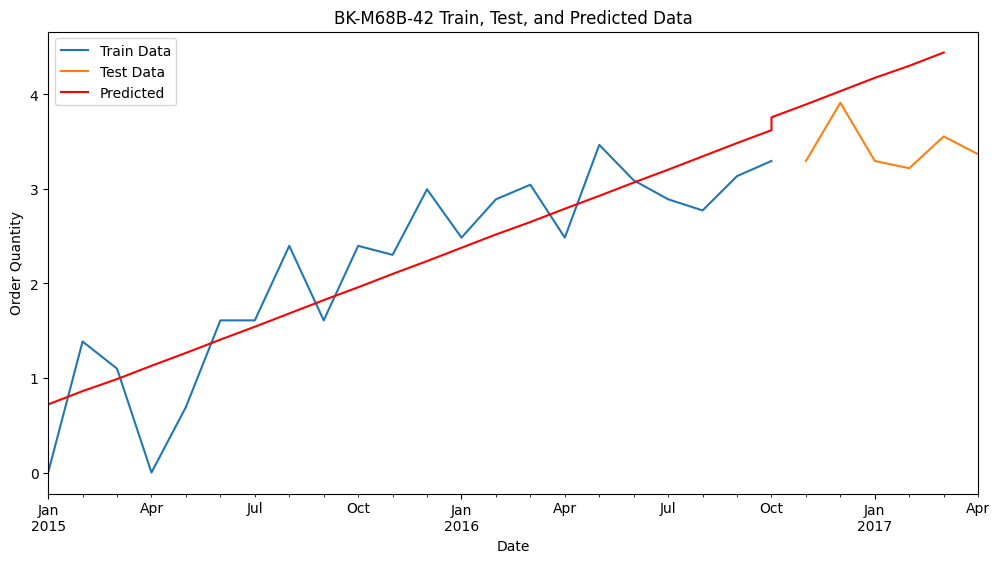

19:38:21 - cmdstanpy - INFO - Chain [1] start processing
19:38:21 - cmdstanpy - INFO - Chain [1] done processing


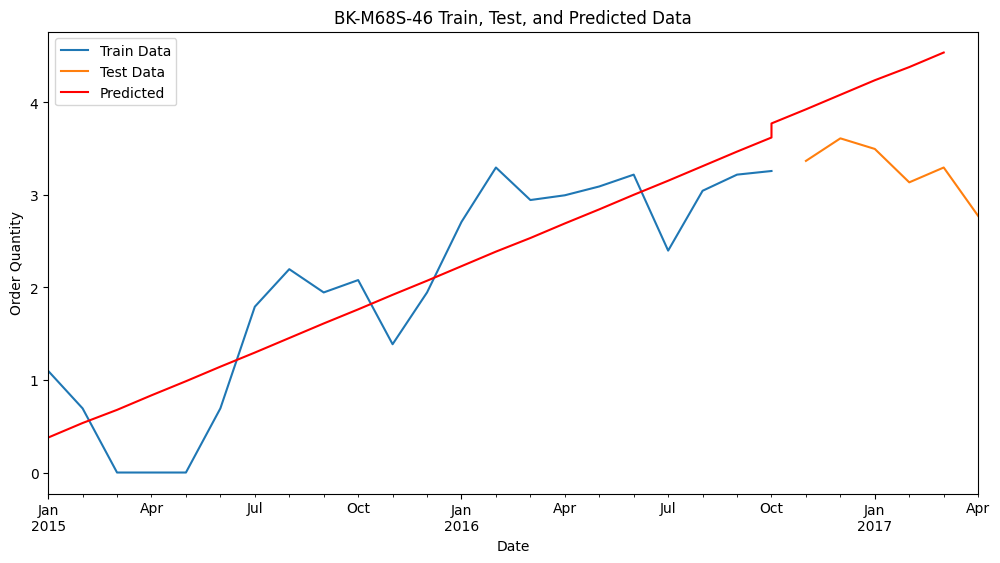

19:38:21 - cmdstanpy - INFO - Chain [1] start processing
19:38:22 - cmdstanpy - INFO - Chain [1] done processing


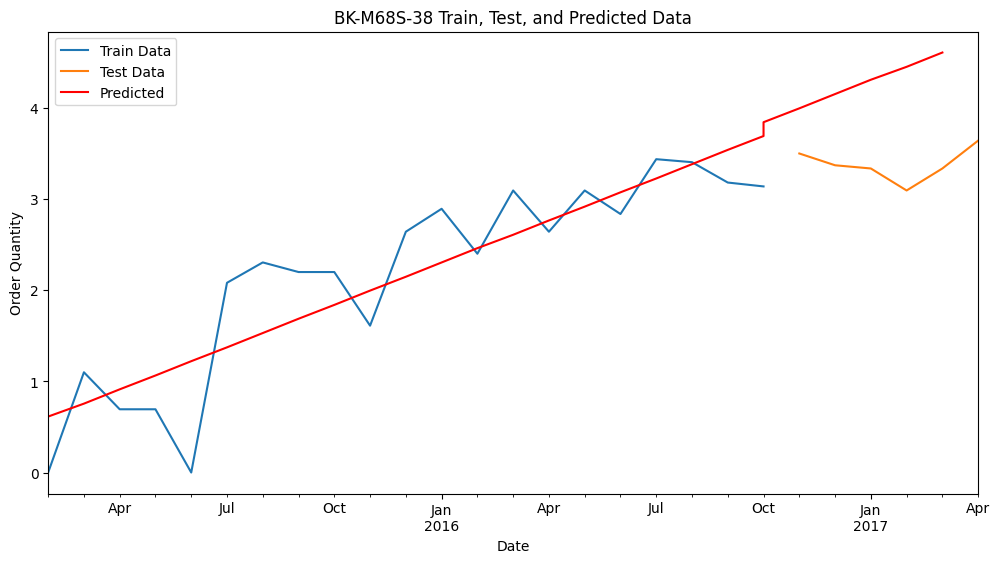

19:38:22 - cmdstanpy - INFO - Chain [1] start processing
19:38:22 - cmdstanpy - INFO - Chain [1] done processing


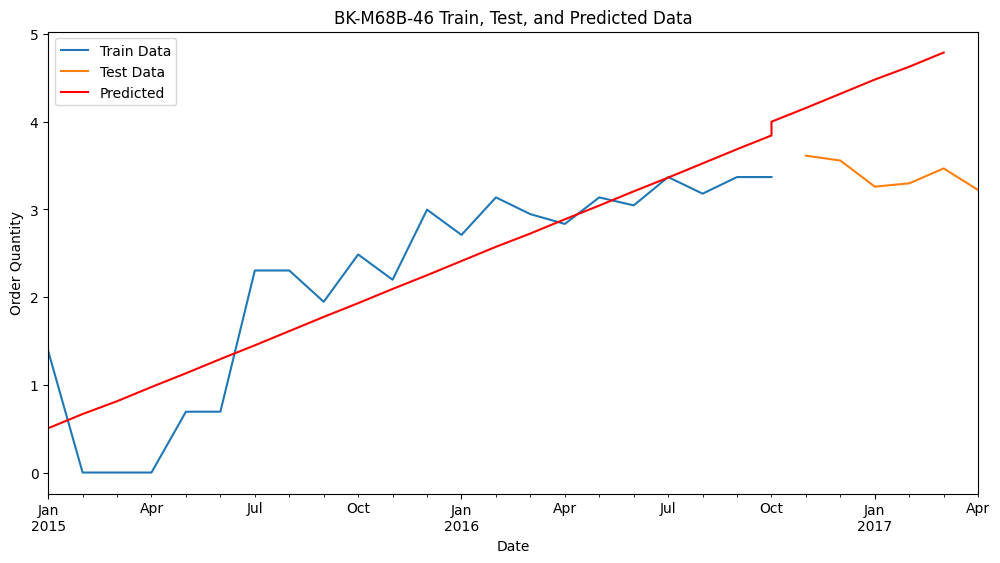

19:38:23 - cmdstanpy - INFO - Chain [1] start processing
19:38:23 - cmdstanpy - INFO - Chain [1] done processing


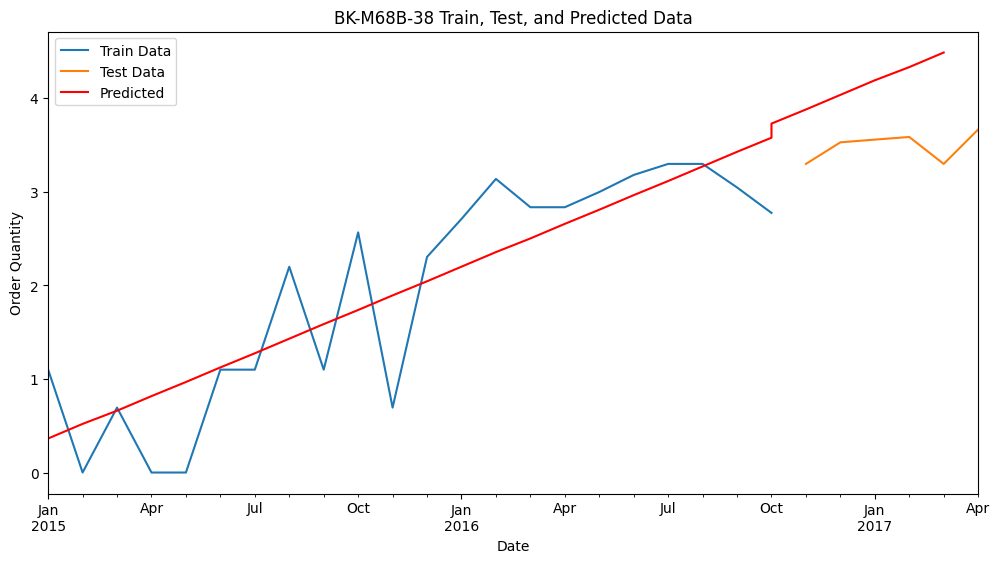

In [50]:

model_score = {}
for product in product_ids:
    data = selected_products[selected_products['ProductSKU'] == product]
    data = data.drop('ProductSKU', axis =1).set_index('OrderDate')
    data = data.resample('MS').sum()
    train, test = ready_data(data)
    
    r2, rmse, model = apply_prophet(train, test, best_params_dict[product])
    model_score[product] = {'r2': r2, 'rmse': rmse, 'model': model}
    
    
    # Plotting 
    model = model_score[product]['model']
    future = model.make_future_dataframe(periods=len(test), freq='M')

    forecast = model.predict(future)

    fig, ax = plt.subplots(figsize=(12, 6))

    train.set_index('ds', inplace =True)
    train['y'].plot(ax=ax, label='Train Data')

    test.set_index('ds', inplace =True)
    test['y'].plot(ax=ax, label='Test Data')

    forecast.set_index('ds', inplace=True)
    forecast['yhat'].plot(ax=ax, label='Predicted', color='r')

    
    
    plt.title(product + ' Train, Test, and Predicted Data')
    plt.xlabel('Date')
    plt.ylabel('Order Quantity')
    plt.legend()
    plt.show()
    